In [1]:
import sys
import numpy as np
from scipy.stats import spearmanr
sys.path.insert(0,'..')
from datastore import DataStore
from fairness import Fairness

In [ ]:
# GENERATION OF FAIRNESS SYNTHETIC DATA
np.random.seed(2)
n_rows = 1000
n_proxies = 5
n_characteristics = 5
df = pd.DataFrame()
df['unique_id'] = range(n_rows)
df['consumption'] = 0
for proxy in range(n_proxies):
    df['proxy' + str(proxy)] = df['consumption'] + np.random.randint(size=n_rows, low=0, high=proxy+5)
for characteristic in range(n_characteristics):
    n_categories = np.random.randint(low=2, high=7)
    df['characteristic' + str(characteristic)] = np.random.randint(size=n_rows, low=0, high=n_categories)
    df['characteristic' + str(characteristic)] = df['characteristic' + str(characteristic)]\
        .apply(lambda x: 'group' + str(x))
for proxy in ['proxy0', 'proxy1']:
    df[proxy] = df[proxy] + df['characteristic1'].apply(lambda x: int(x[-1]))
df['weight'] = np.random.randint(10, 100, size=n_rows)
# df.to_csv('../synthetic_data/fairness.csv', index=False)

In [2]:
datastore = DataStore('../configs/config.yml')
fairness = Fairness(datastore=datastore)

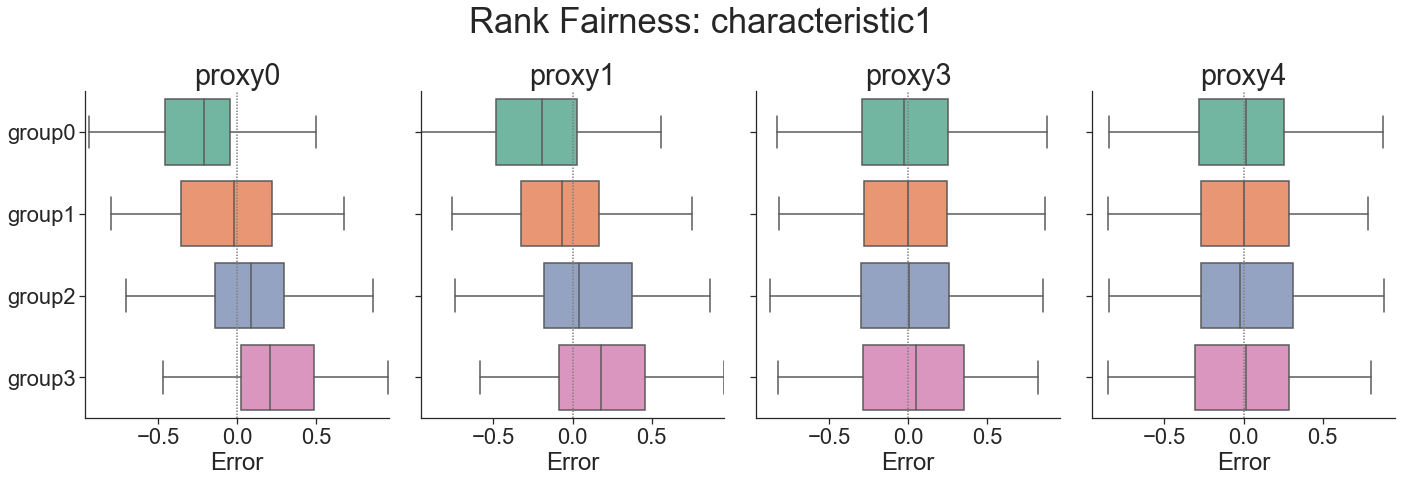

In [3]:
fairness.rank_residuals_plot('consumption', ['proxy0', 'proxy1', 'proxy3', 'proxy4'], 'characteristic1')

In [4]:
fairness.rank_residuals_table('consumption', ['proxy0', 'proxy1', 'proxy3'], 'characteristic1')

,characteristic1,proxy0,proxy1,proxy3
0,group0,-0.24 (0.31),-0.20 (0.34),-0.02 (0.38)
1,group1,-0.06 (0.36),-0.05 (0.36),0.00 (0.38)
2,group2,0.07 (0.34),0.08 (0.38),-0.01 (0.39)
3,group3,0.24 (0.31),0.18 (0.35),0.03 (0.40)
4,Anova F-Stat,92.783343,53.114905,0.586905
5,Anova p-value,0.000000,0.000000,0.623669


In [5]:
fairness.demographic_parity_table('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)

,characteristic1,Group's share of population,Share of Group in Target Population,proxy0,proxy1,proxy2,proxy3
0,group0,24.90%,27.31%,31.325301,23.694779,-0.401606,1.204819
1,group1,25.70%,26.07%,7.003891,7.782101,-3.891051,1.945525
2,group2,25.90%,25.87%,-10.810811,-9.652510,3.474903,2.702703
3,group3,23.50%,28.94%,-28.936170,-22.978723,0.851064,-6.382979


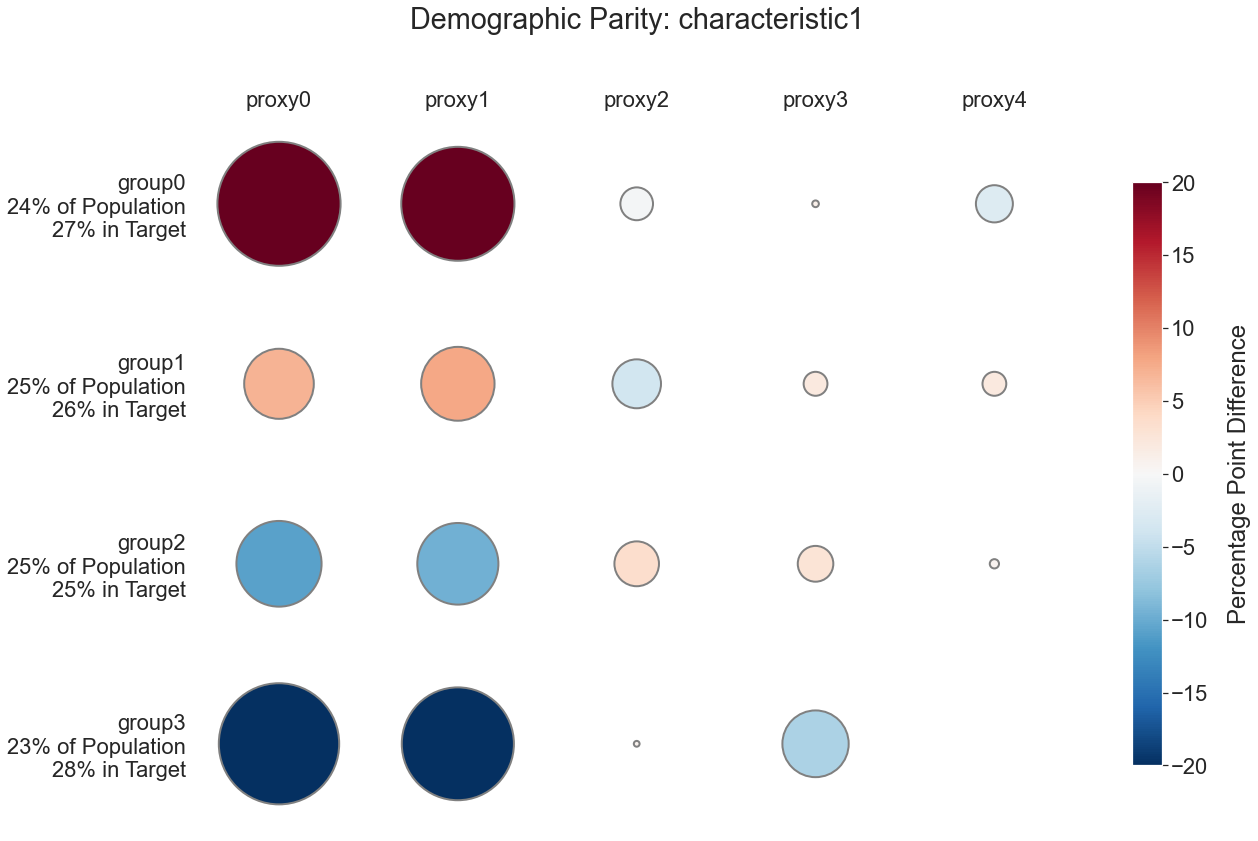

In [6]:
fairness.demographic_parity_plot('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3', 'proxy4'], 
                                 'characteristic1', 27)